In [2]:
pip install pandas scikit-learn matplotlib seaborn


  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     ---------------------------------------- 60.8/60.8 kB 1.6 MB/s eta 0:00:00
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     ---------------------------------------- 60.8/60.8 kB 3.2 MB/s eta 0:00:00
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
     ---------------------------------------- 0.0/106.6 kB ? eta -:--:--
     -------------------------------------- 106.6/106.6 kB 6.0 MB/s eta 0:00:00
  Using cached kiwisolver-1.4.8-cp311-cp311-win_amd64.whl.metadata (6.3 kB)
  Using cached pyparsing-3.2.3-py3-none-any.whl.metadata (5.0 kB)
   ---------------------------------------- 0.0/11.6 MB ? eta -:--:--
   - -------------------------------------- 0.4/11.6 MB 7.4 MB/s eta


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import pandas as pd
import numpy as np
import seaborn as sns

In [5]:
import warnings
warnings.filterwarnings("ignore")


In [6]:
df = pd.read_csv("data.csv")
df.head()

,footfall,tempMode,AQ,USS,CS,VOC,RP,IP,Temperature,fail
0,0,7,7,1,6,6,36,3,1,1
1,190,1,3,3,5,1,20,4,1,0
2,31,7,2,2,6,1,24,6,1,0
3,83,4,3,4,5,1,28,6,1,0
4,640,7,5,6,4,0,68,6,1,0


In [7]:
df[df["fail"]==1]

,footfall,tempMode,AQ,USS,CS,VOC,RP,IP,Temperature,fail
0,0,7,7,1,6,6,36,3,1,1
12,190,2,5,4,6,5,22,4,1,1
18,33,7,6,2,6,5,51,4,1,1
23,0,7,6,1,6,6,44,4,2,1
34,640,7,7,5,7,4,33,3,3,1
...,...,...,...,...,...,...,...,...,...,...
939,0,7,7,1,6,4,73,6,24,1
940,0,7,5,2,6,6,50,6,24,1
941,0,3,6,2,7,5,43,6,24,1
942,0,6,6,2,5,6,46,7,24,1


In [7]:
# footfall: The number of people or objects passing by the machine.
# tempMode: The temperature mode or setting of the machine.
# AQ: Air quality index near the machine.
# USS: Ultrasonic sensor data, indicating proximity measurements.
# CS: Current sensor readings, indicating the electrical current usage of the machine.
# VOC: Volatile organic compounds level detected near the machine.
# RP: Rotational position or RPM (revolutions per minute) of the machine parts.
# IP: Input pressure to the machine.
# Temperature: The operating temperature of the machine.
# fail: Binary indicator of machine failure (1 for failure, 0 for no failure).

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 944 entries, 0 to 943
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   footfall     944 non-null    int64
 1   tempMode     944 non-null    int64
 2   AQ           944 non-null    int64
 3   USS          944 non-null    int64
 4   CS           944 non-null    int64
 5   VOC          944 non-null    int64
 6   RP           944 non-null    int64
 7   IP           944 non-null    int64
 8   Temperature  944 non-null    int64
 9   fail         944 non-null    int64
dtypes: int64(10)
memory usage: 73.9 KB


In [9]:
df.isnull().sum()

footfall       0
tempMode       0
AQ             0
USS            0
CS             0
VOC            0
RP             0
IP             0
Temperature    0
fail           0
dtype: int64

In [10]:
df.duplicated().sum()

np.int64(1)

In [11]:
duplicate_rows = df[df.duplicated()]
print(duplicate_rows)

     footfall  tempMode  AQ  USS  CS  VOC  RP  IP  Temperature  fail
766        31         5   3    3   6    1  48   6           21     0


In [12]:
df=df.drop_duplicates()

In [13]:
df.duplicated().sum()

np.int64(0)

In [14]:
df.dtypes

footfall       int64
tempMode       int64
AQ             int64
USS            int64
CS             int64
VOC            int64
RP             int64
IP             int64
Temperature    int64
fail           int64
dtype: object

In [15]:
df.nunique()

footfall       99
tempMode        8
AQ              7
USS             7
CS              7
VOC             7
RP             71
IP              7
Temperature    24
fail            2
dtype: int64

<Axes: >

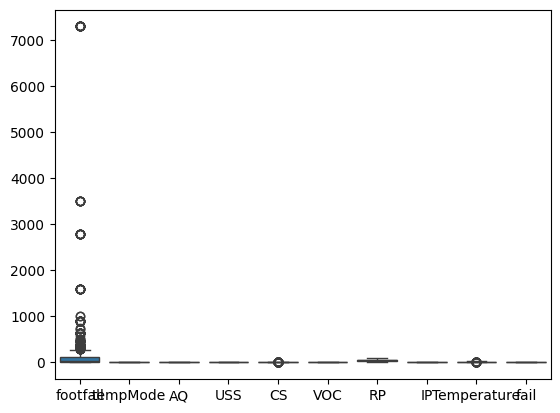

In [16]:
sns.boxplot(data=df)


In [17]:
#The above graph indicates that the footfall column has most amount of outliers i.e.
#the other columns distributions are not visible in detail because the y-axis is stretched 
#due to the outliers in "footfall"

<Axes: >

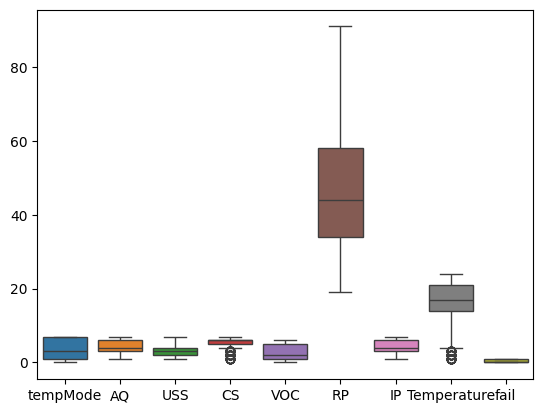

In [17]:
#Plotting rest of the columns seperately
sns.boxplot(data=df.drop(columns='footfall'))


In [18]:
from sklearn.ensemble import IsolationForest

# Initialize Isolation Forest
iso_forest = IsolationForest(contamination=0.05, random_state=42)  # 5% contamination assumed

# Fit on 'footfall' column
df['footfall_outlier'] = iso_forest.fit_predict(df[['footfall']])

# -1 indicates an outlier, 1 indicates an inlier
# You can filter out outliers as follows
outliers = df[df['footfall_outlier'] == -1]
inliers = df[df['footfall_outlier'] == 1]

# Display outliers
print(outliers)


     footfall  tempMode  AQ  USS  CS  VOC  RP  IP  Temperature  fail  \
9        2800         0   3    3   7    0  39   3            1     0   
10       1600         0   3    2   4    4  26   2            1     0   
61       3500         7   2    2   6    0  34   4            4     0   
90       1600         1   3    3   6    1  24   6            6     0   
105      3500         0   4    3   7    0  91   1            7     0   
115      7300         5   7    7   6    3  21   2            8     0   
125      7300         5   3    4   3    3  36   4            8     0   
126      2800         0   1    1   7    0  38   3            9     0   
130      7300         1   2    2   7    3  27   6            9     0   
154      1600         5   4    4   6    0  41   7           11     0   
161      7300         3   5    3   6    1  19   4           11     0   
174      2800         0   3    6   1    0  28   2           12     0   
195      1600         7   4    6   1    0  70   3           12  

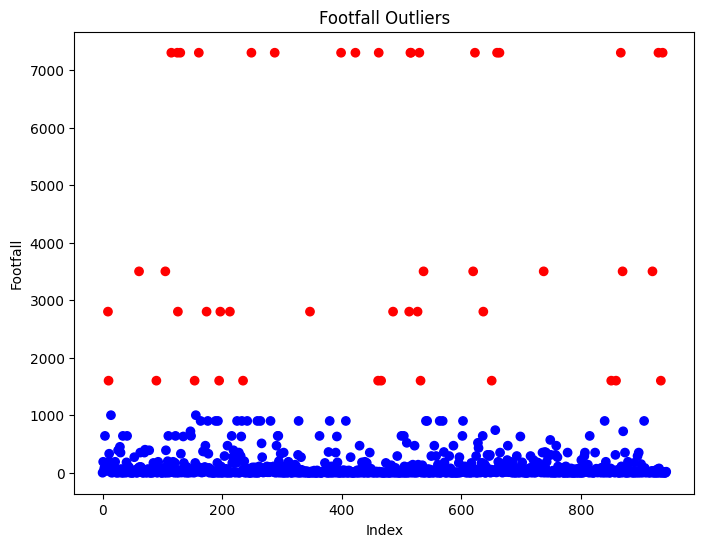

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(df.index, df['footfall'], color=['red' if x == -1 else 'blue' for x in df['footfall_outlier']])
plt.title("Footfall Outliers")
plt.xlabel("Index")
plt.ylabel("Footfall")
plt.show()


In [20]:
# Remove the outliers from the dataset
df = df[df['footfall_outlier'] == 1].drop(columns='footfall_outlier')



In [21]:
df.head()

,footfall,tempMode,AQ,USS,CS,VOC,RP,IP,Temperature,fail
0,0,7,7,1,6,6,36,3,1,1
1,190,1,3,3,5,1,20,4,1,0
2,31,7,2,2,6,1,24,6,1,0
3,83,4,3,4,5,1,28,6,1,0
4,640,7,5,6,4,0,68,6,1,0


In [22]:
df.describe()

,footfall,tempMode,AQ,USS,CS,VOC,RP,IP,Temperature,fail
count,896.000000,896.000000,896.000000,896.000000,896.000000,896.000000,896.000000,896.000000,896.000000,896.000000
mean,96.085938,3.713170,4.351562,2.943080,5.388393,2.885045,47.237723,4.555804,16.352679,0.422991
std,187.547501,2.671447,1.433930,1.389545,1.253749,2.271799,16.398813,1.593706,5.968685,0.494310
min,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,19.000000,1.000000,1.000000,0.000000
25%,0.000000,1.000000,3.000000,2.000000,5.000000,1.000000,35.000000,3.000000,14.000000,0.000000
50%,19.000000,3.000000,4.000000,3.000000,6.000000,2.000000,44.000000,4.000000,17.000000,0.000000
75%,83.000000,7.000000,6.000000,4.000000,6.000000,5.000000,58.000000,6.000000,21.000000,1.000000
max,1000.000000,7.000000,7.000000,7.000000,7.000000,6.000000,91.000000,7.000000,24.000000,1.000000


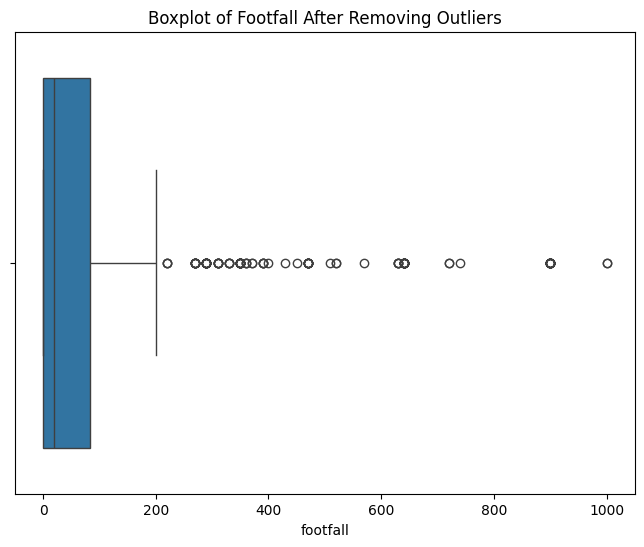

In [23]:
import seaborn as sns

# Boxplot for footfall after removing outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['footfall'])
plt.title('Boxplot of Footfall After Removing Outliers')
plt.show()


<Axes: >

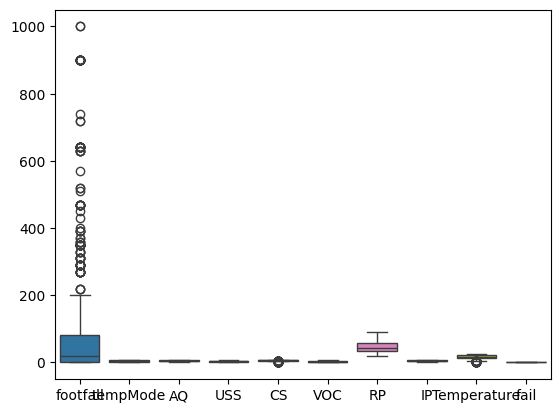

In [24]:
sns.boxplot(data=df)

In [25]:
correlation = df[['footfall', 'fail']].corr()
print(correlation)

          footfall      fail
footfall  1.000000 -0.133762
fail     -0.133762  1.000000


<Axes: >

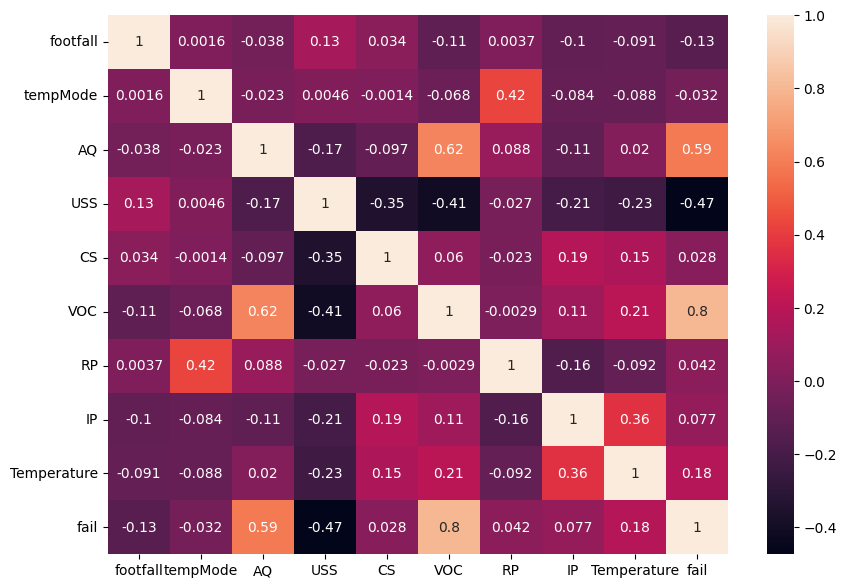

In [26]:
corelation = df.corr()
plt.figure(figsize=(10,7))
sns.heatmap(corelation, annot=True)

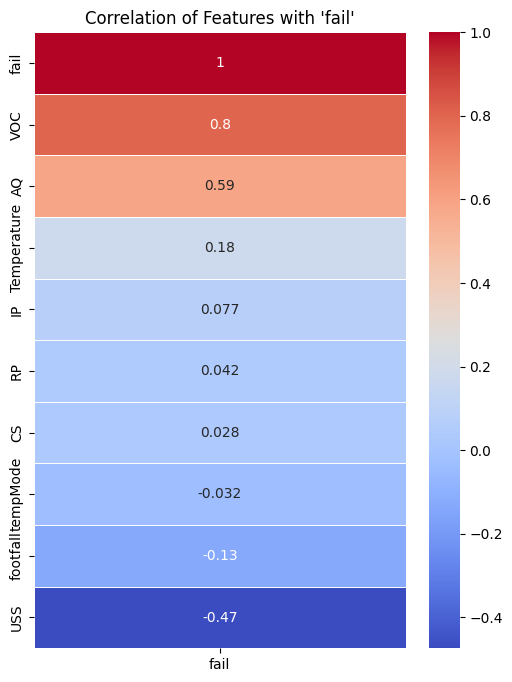

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
correlation_matrix = df.corr()

# Focus only on correlation with 'fail'
fail_correlation = correlation_matrix[['fail']].sort_values(by='fail', ascending=False)

# Plot the heatmap
plt.figure(figsize=(6, 8))
sns.heatmap(fail_correlation, annot=True, cmap='coolwarm', cbar=True, linewidths=0.5)
plt.title("Correlation of Features with 'fail'")
plt.show()


In [28]:
#Thus only selecting those columns whose |feature.cor()|>0.4 i.e.
#VOC, AQ, USS 
#Taking temp as an extra to check further

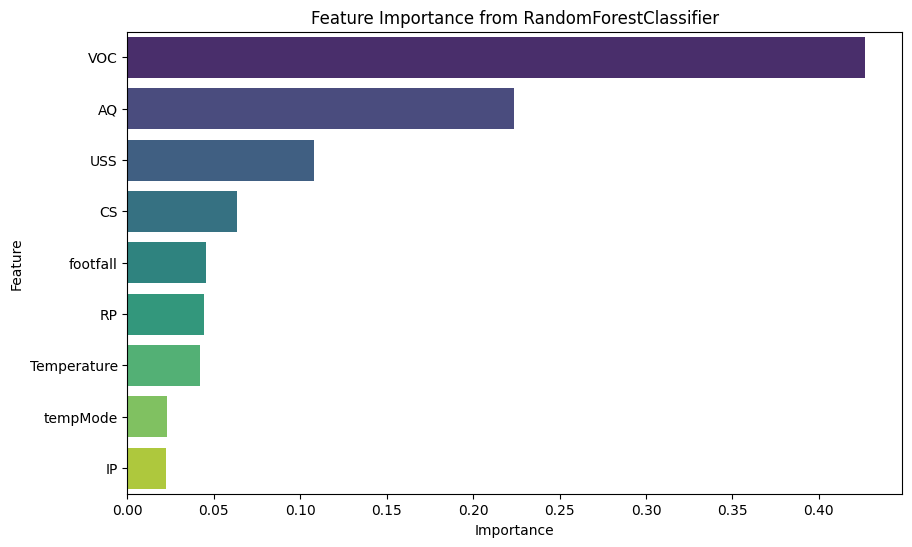

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Step 1: Define features (X) and target (y)
X = df.drop('fail', axis=1)  # drop the target
y = df['fail']               # target variable

# Step 2: Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Step 4: Get feature importances
importances = model.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Step 5: Sort and plot
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df, x='Importance', y='Feature', palette='viridis')
plt.title("Feature Importance from RandomForestClassifier")
plt.show()


In [31]:
#Random Forest Classifier
# Goes beyond correlation (which is linear); detects nonlinear relationships.
#Helps identify hidden signal even when correlation is weak.

In [32]:
#Thus include CS as well even though it has weaker linear correlation and 
# rejecting temperature as it has both weak coorelation and low importance

In [30]:
selected_features = ["AQ", "USS", "VOC", "CS", "fail"] 
df_selected = df[selected_features]
df_selected.head()

,AQ,USS,VOC,CS,fail
0,7,1,6,6,1
1,3,3,1,5,0
2,2,2,1,6,0
3,3,4,1,5,0
4,5,6,0,4,0


In [31]:
df_selected.shape

(896, 5)

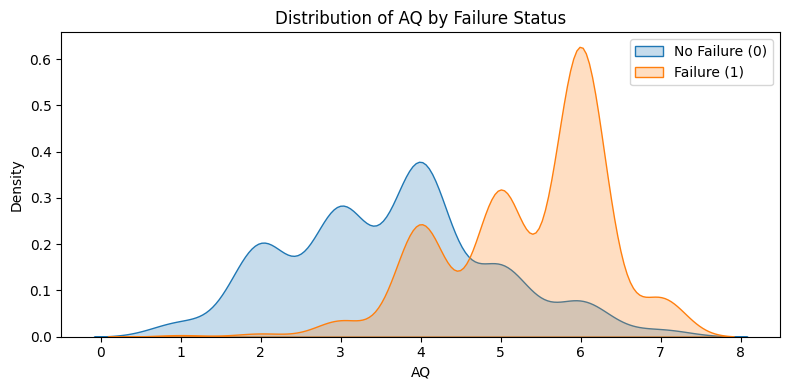

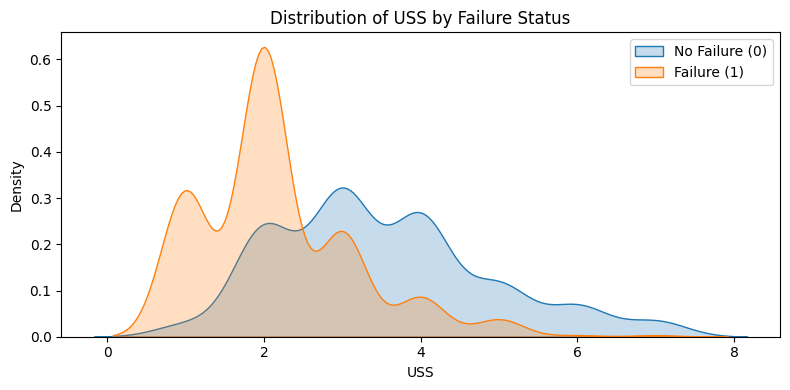

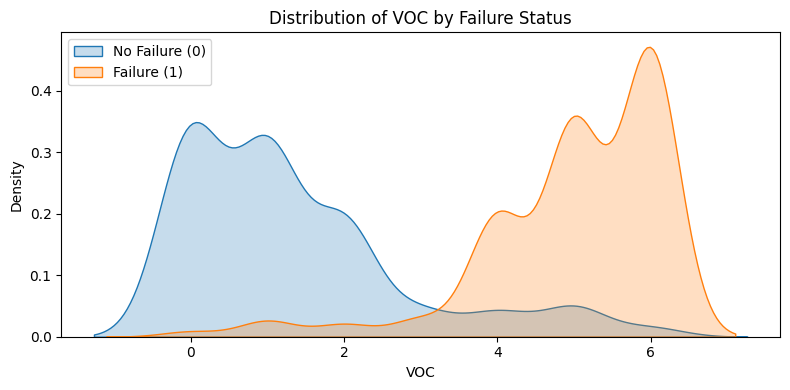

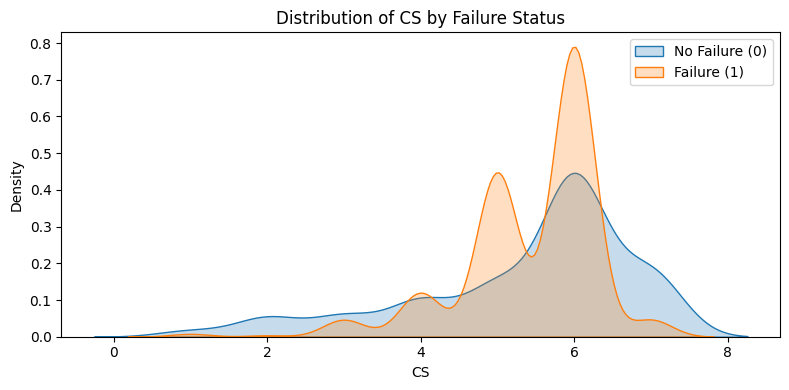

In [32]:
# Split into failure and non-failure groups
fail_1 = df_selected[df_selected['fail'] == 1]
fail_0 = df_selected[df_selected['fail'] == 0]

# Plot KDE for each selected feature
for col in df_selected.columns[:-1]:  # skip 'fail'
    plt.figure(figsize=(8, 4))
    sns.kdeplot(fail_0[col], label='No Failure (0)', shade=True)
    sns.kdeplot(fail_1[col], label='Failure (1)', shade=True)
    plt.title(f"Distribution of {col} by Failure Status")
    plt.xlabel(col)
    plt.ylabel("Density")
    plt.legend()
    plt.tight_layout()
    plt.show()

In [36]:
# If the two curves are clearly separated, the feature is useful for prediction.
# If the curves overlap a lot, the feature might have low discriminative power.
# Thus dropping CS as well

In [33]:
selected_features = ["AQ", "USS", "VOC", "fail"] 
df_selected = df[selected_features]
df_selected.head()

,AQ,USS,VOC,fail
0,7,1,6,1
1,3,3,1,0
2,2,2,1,0
3,3,4,1,0
4,5,6,0,0


In [36]:
from sklearn.preprocessing import StandardScaler

# Separate features (X) and target (y)
X = df_selected.drop('fail', axis=1).values
y = df_selected['fail']

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
import tensorflow as tf


model = tf.keras.models.Sequential(
    [
        tf.keras.layers.Dense(4, activation='relu',input_shape=(x_train.shape[1],)),
        tf.keras.layers.Dense(16, activation='relu'),
        tf.keras.layers.Dense(8, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ]
)

In [38]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [39]:
early_stopping = tf.keras.callbacks.EarlyStopping(patience=10, monitor='loss')

model.fit(x_train, y_train, epochs=300, callbacks=[early_stopping])

Epoch 1/300
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5806 - loss: 0.7362   
Epoch 2/300
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6761 - loss: 0.6418 
Epoch 3/300
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8996 - loss: 0.5952 
Epoch 4/300
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9094 - loss: 0.5409 
Epoch 5/300
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9191 - loss: 0.4617 
Epoch 6/300
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9087 - loss: 0.4001 
Epoch 7/300
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9033 - loss: 0.3578 
Epoch 8/300
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9030 - loss: 0.2979 
Epoch 9/300
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9163 - loss: 0.2834 
Epoch 10/300
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9035 - loss: 0.2815 
Epoch 11/300
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8983 - loss: 0.2804 
Epoch 12/300
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/ste

In [40]:
model.evaluate(x_test, y_test)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8911 - loss: 0.2752  


[0.26545602083206177, 0.8999999761581421]

In [44]:
import heapq

# Predict failure probabilities
predicted_probs = model.predict(x_test).flatten()

# Use row indices as machine identifiers
priority_queue = [(-prob, idx) for idx, prob in enumerate(predicted_probs)]

# Heapify to create a max-heap (highest risk on top)
heapq.heapify(priority_queue)

# Get top 5 highest-risk machines
for _ in range(5):
    risk_score, row_index = heapq.heappop(priority_queue)
    print(f"Machine at row {row_index} - Risk Score: {-risk_score:.2f}")


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Machine at row 97 - Risk Score: 1.00
Machine at row 144 - Risk Score: 1.00
Machine at row 52 - Risk Score: 0.99
Machine at row 63 - Risk Score: 0.99
Machine at row 102 - Risk Score: 0.99
